<a href="https://colab.research.google.com/github/TaufiqueSekh/Employee-Attrition-Rate-Prediction-Using-Machine-Learning/blob/main/Employee_Attrition_Rate_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Employee Attrition Rate Prediction Using Machine Learning
### By Taufique Sekh
### For the code and dataset,visit: https://github.com/TaufiqueSekh/Employee-Attrition-Rate-Prediction-Using-Machine-Learning

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Get the Data

In [ ]:
df=pd.read_csv("/Users/taufique/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Explore the Data set

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# To check is there any null values
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
df.duplicated().sum()

0

### Heatmap showing the correlation of features.

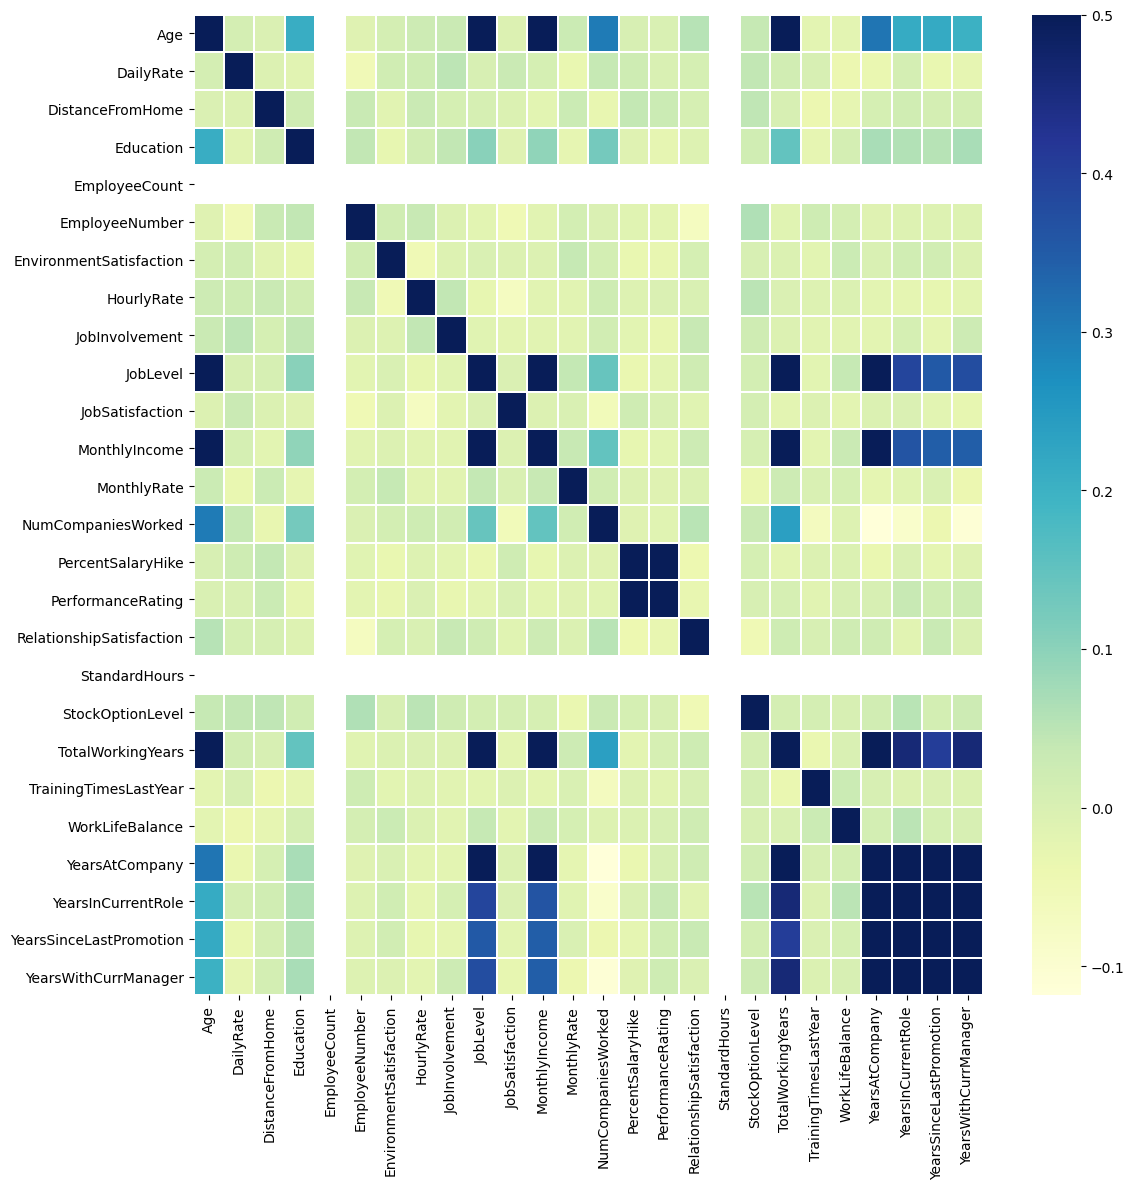

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),vmax=.5, linewidths=.2,cmap="YlGnBu")
plt.tight_layout()
plt.show()

In [ ]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

(array([ 237.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1233.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

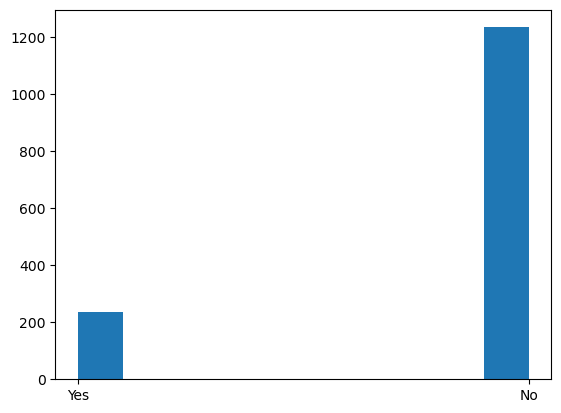

In [ ]:
plt.hist(df['Attrition'])

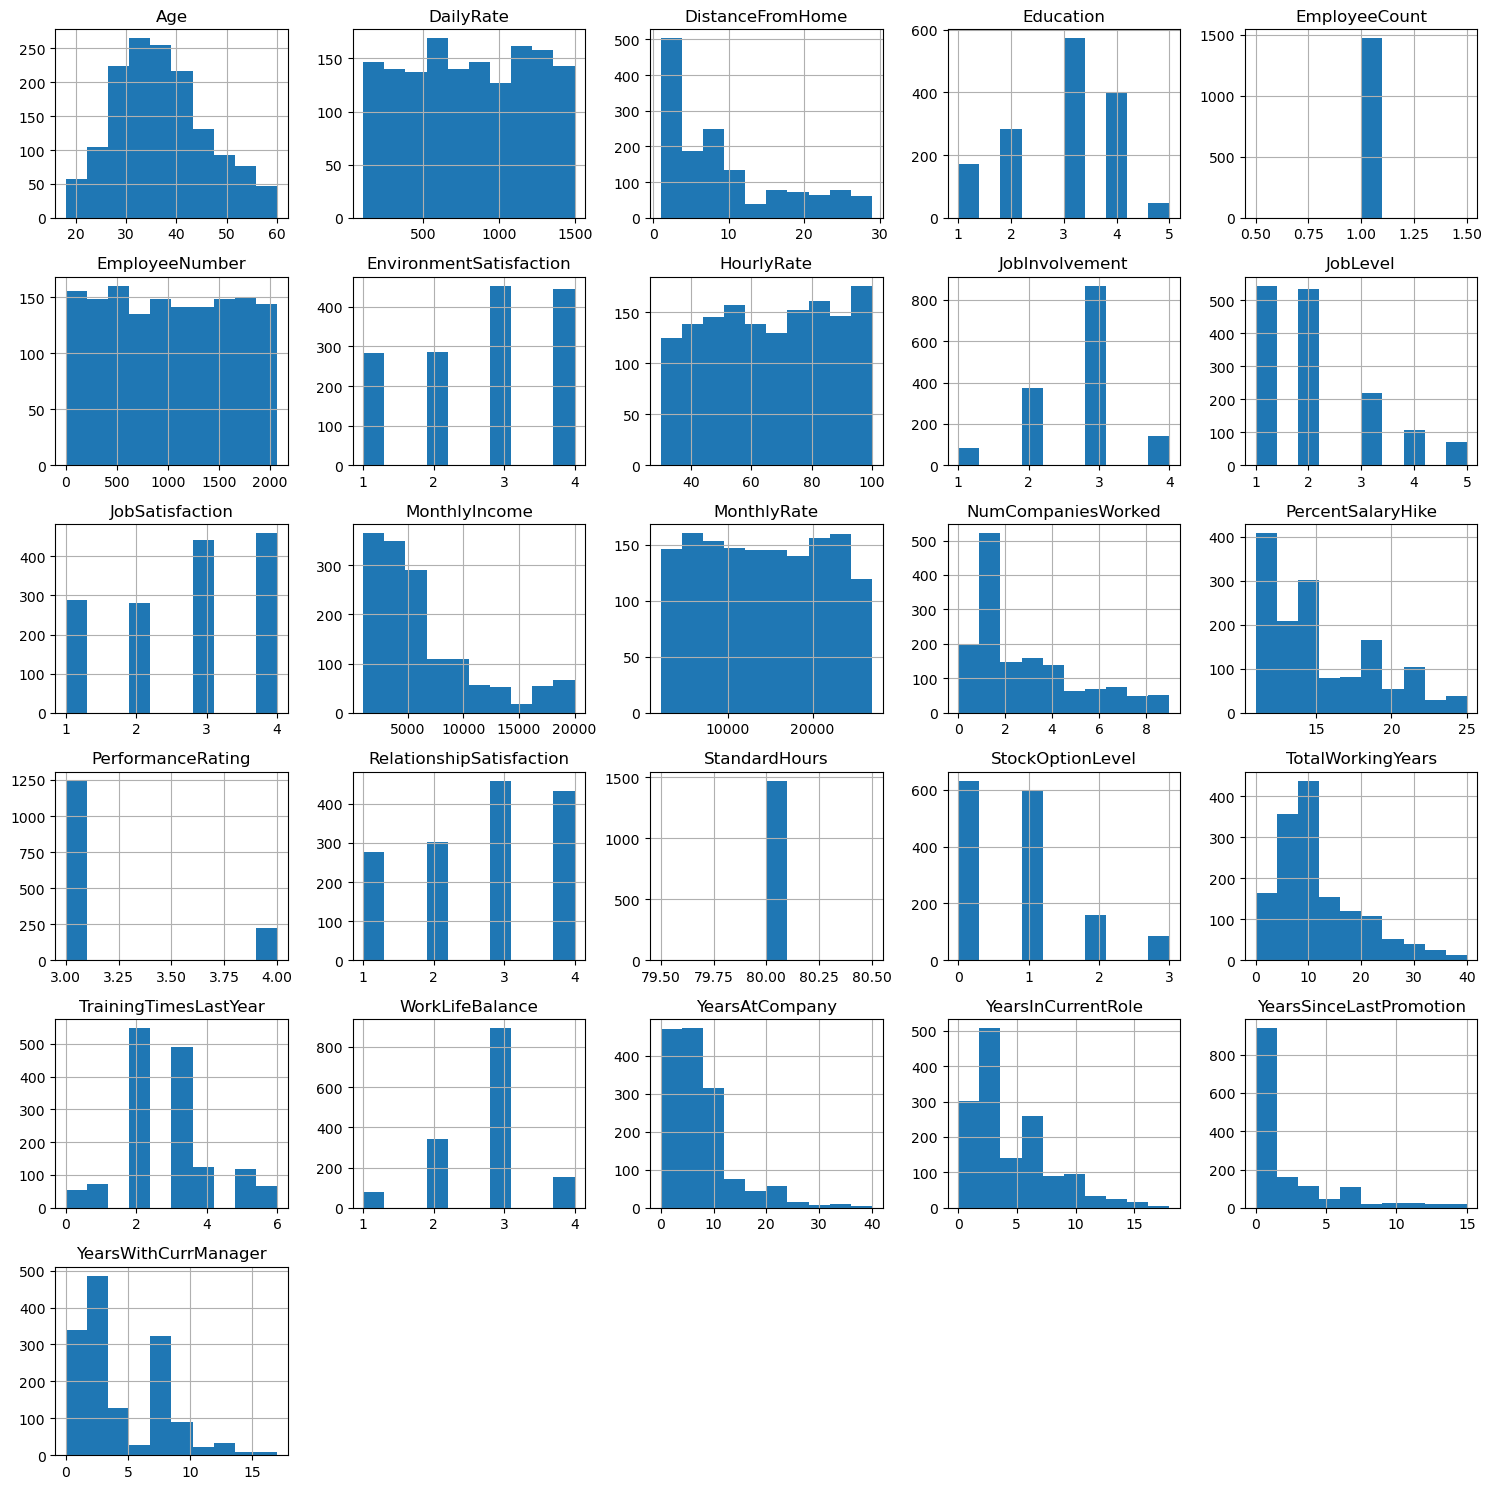

In [ ]:
df.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

Following are some inferences derived from the above histogram plots:

Most distributions are right-skewed (Monthly Income, Total Working Years, Year at Company, Distance From Home, etc.). They are also tail heavy (Tails are not exponentially bounded). 

The age feature is a little right-skewed, and most of the employees have ages between 25–40 years.

'Employee Count' and 'Standard Hours' features are redundant and can be removed from the analysis. 

### Let's explore the age distribution for ex-employees vs. current employees

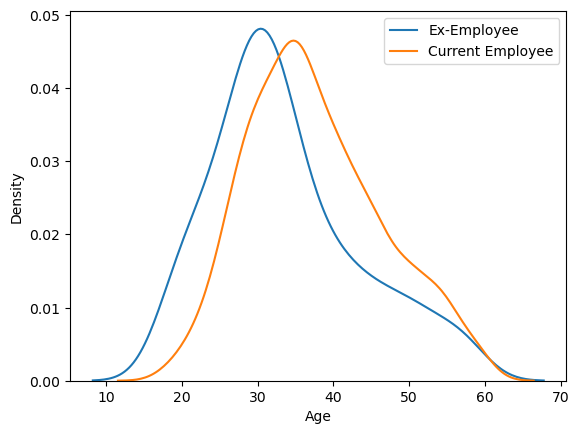

In [ ]:
sns.kdeplot(df[df['Attrition']=='Yes']['Age'],label = 'Ex-Employee')
sns.kdeplot(df[df['Attrition']=='No']['Age'],label = 'Current Employee')
plt.legend()

### Let's see whether "salary" plays a vital role in "attrition"

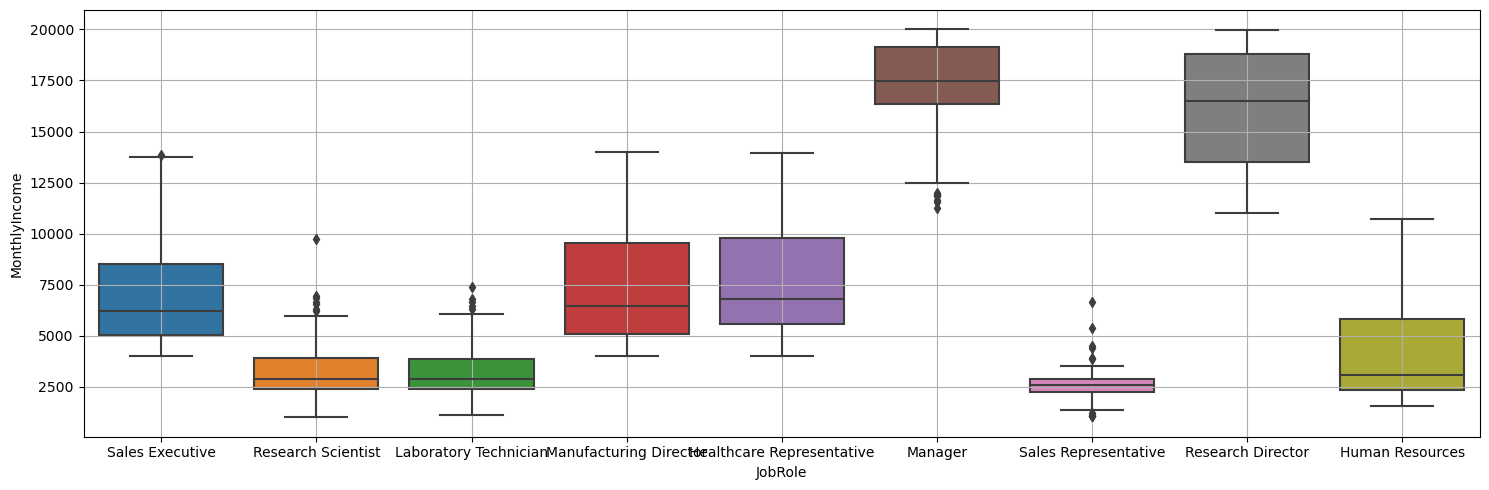

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y=df['MonthlyIncome'],x=df['JobRole'])
plt.grid(True,alpha=1)
plt.tight_layout()
plt.show()

Following are some inferences that we can make from the above boxplot:

Managers and Research directors earn a relatively large sum. Intuitively, the attrition must have an inverse relationship with the monthly income parameter. 

Research Scientist, Lab. Technicians and Sales Representatives positions are not well paid. 
Such factors would lead to attrition in these departments. However, we need to verify these findings first.

### Let's check the attrition among different departments.

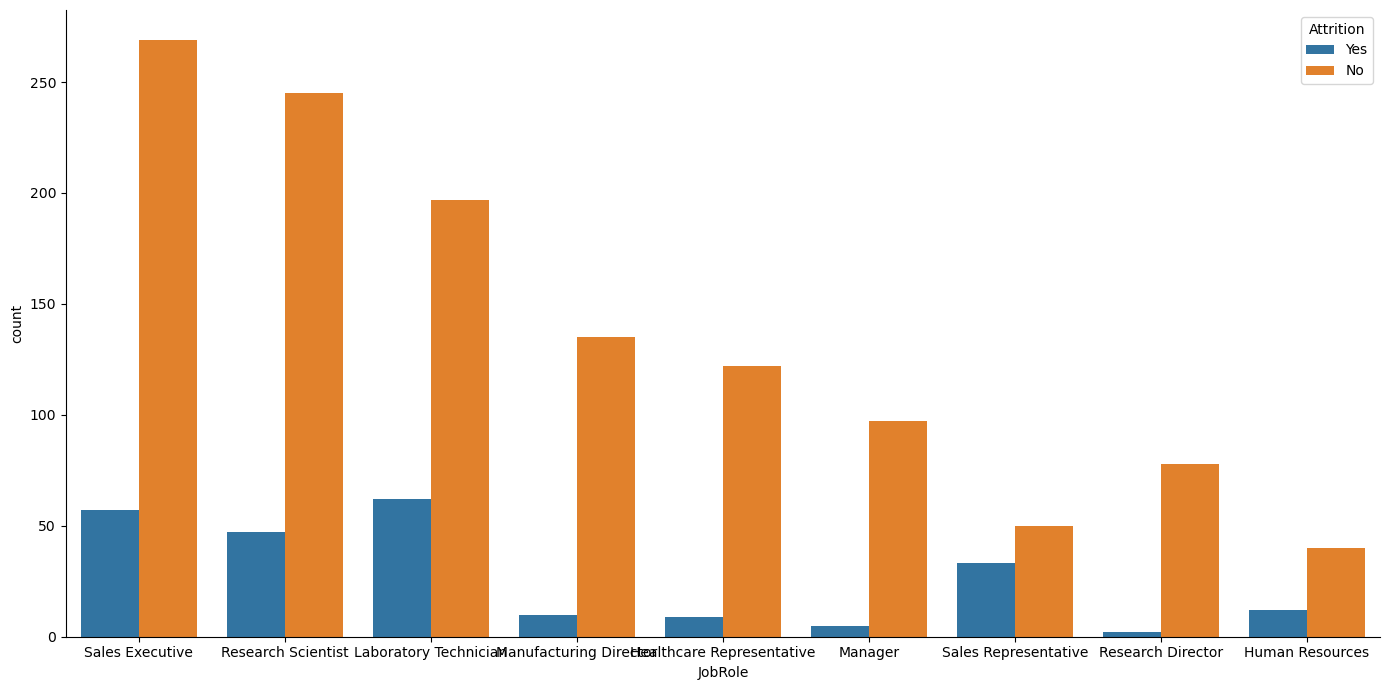

In [ ]:
sns.catplot(x='JobRole', hue='Attrition', data=df, kind="count", height=7, aspect=2, legend=False)
plt.legend(loc='upper right', title='Attrition')
plt.tight_layout()
plt.show()

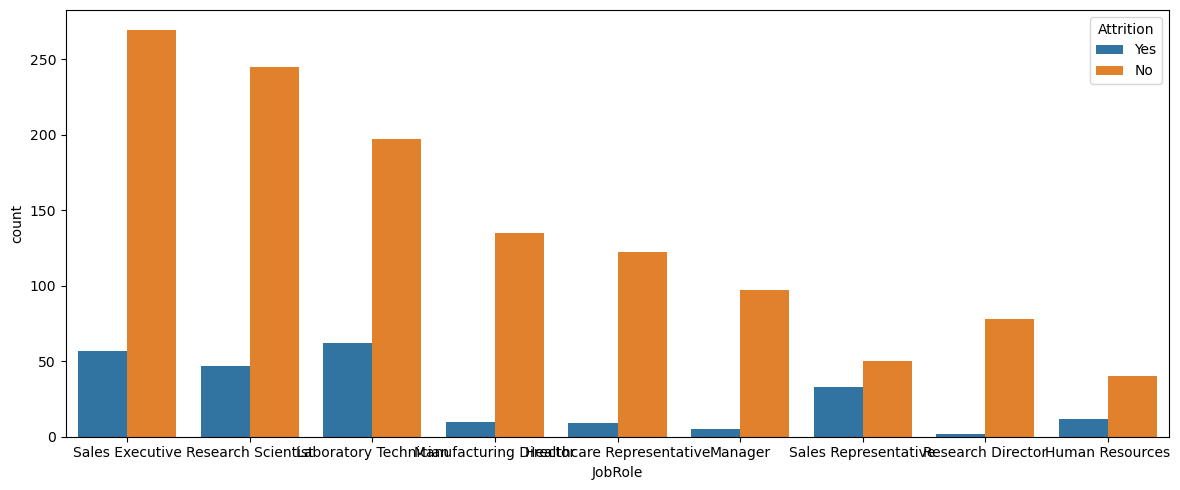

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x=df['JobRole'],hue=df['Attrition'])
plt.tight_layout()


As expected, Research Scientist, Lab. Technicians and Sales representatives have high attrition in their department, whereas Managers and Research Directors have little attrition.
Low Monthly income is one piece of evidence that supports a high attrition rate. 

### Let's see which department is highly involved in the Overtime. 

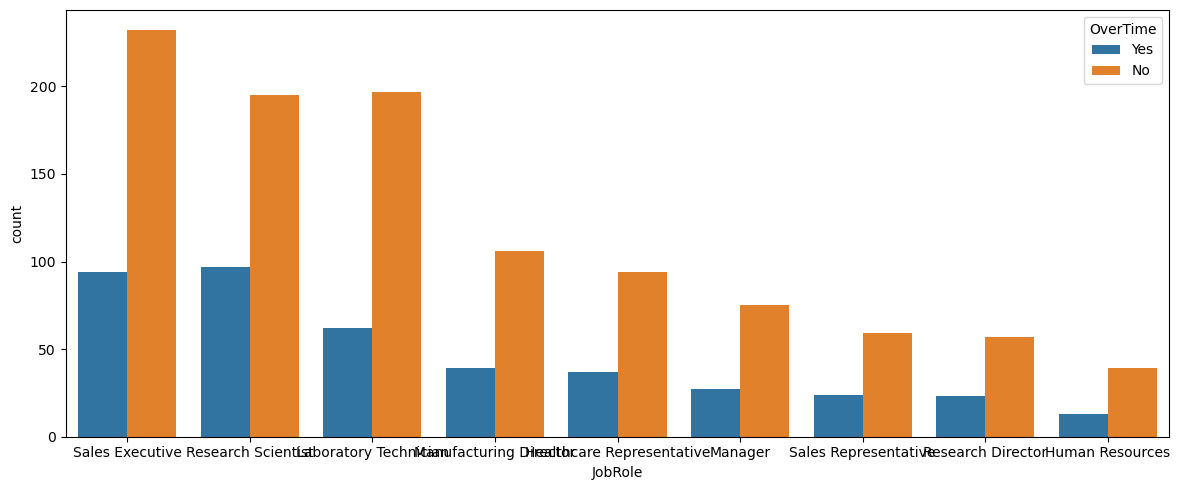

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x=df['JobRole'],hue=df['OverTime'])
plt.tight_layout()

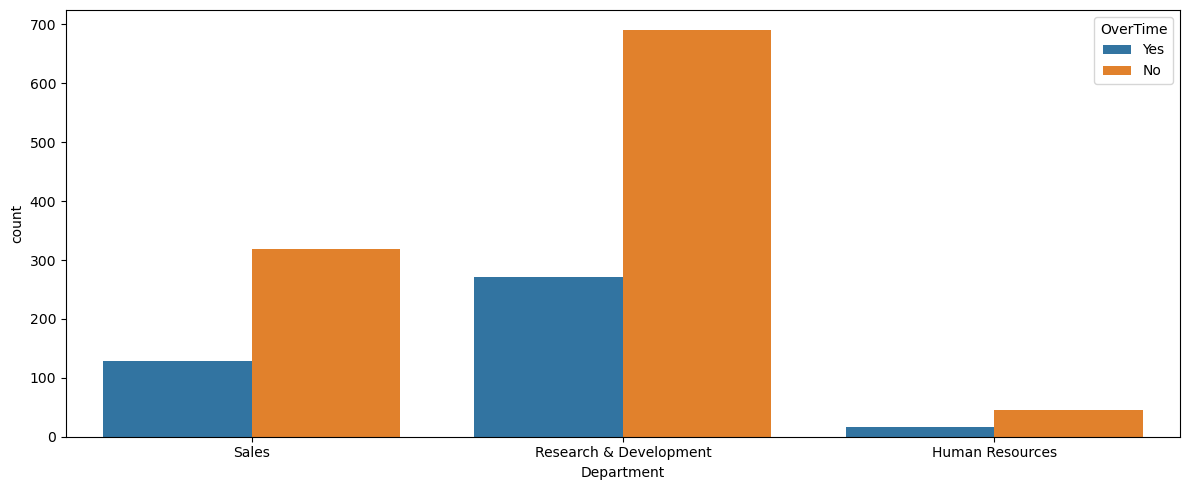

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x=df['Department'],hue=df['OverTime'])
plt.tight_layout()

In [ ]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
# Some features have an "object" data type, which should be a category instead. Let's convert their data type.


In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col]= df[col].astype('category')
        df[col] = df[col].cat.codes

In [ ]:
df.dtypes

Age                         int64
Attrition                    int8
BusinessTravel               int8
DailyRate                   int64
Department                   int8
DistanceFromHome            int64
Education                   int64
EducationField               int8
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                       int8
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                      int8
JobSatisfaction             int64
MaritalStatus                int8
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                       int8
OverTime                     int8
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler


X = df.drop('Attrition',axis=1)
y = df['Attrition']


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Data Normalization
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Defining parameters for hyper-parameter tuning
params = {
        'solver': ['newton-cg', 'liblinear'],
        'penalty': ['l2'],
        'C': np.logspace(-4.5,4.5,50),
        'class_weight':['balanced'],
        'tol':[0.0001, 0.001, 0.01, 0.1],
        'fit_intercept':[True, False],
        'intercept_scaling':[1, 2, 3]
}

# Initializing Grid Search with Logistic Regression and keeping roc_auc as the performance metrics!
grid_search = GridSearchCV(estimator = LogisticRegression(),
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1,
                           verbose=0,
                           scoring="roc_auc",
                           return_train_score=True)

# Training
grid_search.fit(X_train, y_train)

# Best Performing Parameter
print('='*20)
print("best params: " + str(grid_search.best_estimator_))
print("best params: " + str(grid_search.best_params_))
print('best score:', grid_search.best_score_)
print('='*20)

best params: LogisticRegression(C=0.22758459260747887, class_weight='balanced',
                   fit_intercept=False, solver='liblinear', tol=0.001)
best params: {'C': 0.22758459260747887, 'class_weight': 'balanced', 'fit_intercept': False, 'intercept_scaling': 1, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.001}
best score: 0.8257151702786377


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scip

In [ ]:
best_params={'C': [0.22758459260747887], 'class_weight': ['balanced'], 'fit_intercept': [False], 'intercept_scaling': [1], 'penalty': ['l2'], 'solver': ['liblinear'], 'tol': [0.001]}

In [ ]:
best_model=GridSearchCV(estimator = LogisticRegression(),
                           param_grid=best_params,
                           cv = 5,
                           n_jobs=-1,
                           verbose=0,
                           scoring="roc_auc",
                           return_train_score=True)

In [ ]:
best_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.22758459260747887],
                         'class_weight': ['balanced'], 'fit_intercept': [False],
                         'intercept_scaling': [1], 'penalty': ['l2'],
                         'solver': ['liblinear'], 'tol': [0.001]},
             return_train_score=True, scoring='roc_auc')

In [ ]:
y_pred=best_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,balanced_accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay

The accuracy is 0.74
The balanced accuracy is 0.68
The recall is 0.59
The precision is 0.29
The F1 Score is 0.39
The AUC ROC Score is 0.68


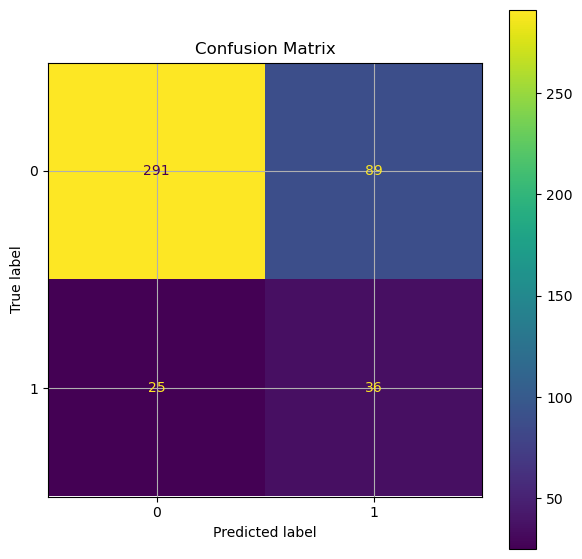

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [ ]:
# Performance Evaluation Metrics 
print("The accuracy is {:.2f}".format(accuracy_score(y_test, y_pred)))
print("The balanced accuracy is {:.2f}".format(balanced_accuracy_score(y_test, y_pred)))
print("The recall is {:.2f}".format(recall_score(y_test, y_pred)))
print("The precision is {:.2f}".format(precision_score(y_test, y_pred)))
print("The F1 Score is {:.2f}".format(f1_score(y_test, y_pred)))
print("The AUC ROC Score is {:.2f}".format(roc_auc_score(y_test, y_pred)))

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_model.classes_)
                              
fig, ax = plt.subplots(figsize=(7,7))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.grid(None)
plt.show()

Accuracy, Balanced Accuracy, Recall, and AUCROC seem promising, but since our data is imbalanced. Generally, accuracy is not the best metric to count on, and it could be deceiving in some cases. However, Recall and AUCROC suggest a good fit in this data. Precision is a little on the lower side, and finally, the confusion matrix confirms the presence of false-positive cases, which affects the precision of the model. On the bright side, false negatives are low, so recall is significantly improved.